# Guía 3 ejercicio 11

## Samantha Kucher

## a) 

Sea $ x $ una variable aleatoria con distribución uniforme en [0,1]. Se define una nueva variable aleatoria $ y = e^x $ ($ 1 \leq y \leq e $).   
   
La función de distribución de $ x $ es, entonces, $ F_x (t) = t $, con $ 0 \leq t \leq 1$. Busco ahora la función de distribución de $ y $:   

<center>
$ F_y (t) = P(y \leq t) = P(e^x \leq t) = P(x \leq \ln (t) ) = F_x (\ln (t)) = \ln (t) $
</center></h1>
    
Al derivar $F_y (t) $ se obtiene la densidad de probabilidad de $ y $, siendo ésta $f_y (t)  = 1/t $.

In [2]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def fy(t):
    return 1.00/t
M = 100000 #tomo muchos puntos para poder observar claramente si corresponde o no con la distribucion esperada
x = uniform.rvs(size=M) #numeros aleatorios con distribucion uniforme
y = np.exp(x)

Al aplicar la función $ y =  e^x $, genero números aleatorios con distribución $1/x $ a partir de números con distribución uniforme, como se muestra en el siguiente histograma.

In [11]:
puntos_a = np.linspace(1,np.e,300) #puntos para graficar f(x)
bines = np.linspace(1,np.e,50)
numero, bins = np.histogram(y, bins = bines) #numero=numero de entradas por bin
error = np.sqrt(numero) / (np.diff(bins)* np.sum(numero)) #error poissoniano
numero = numero / (np.diff(bins) * np.sum(numero)) #Normalizo a 1 (divido por el área ocupada por el histograma)

Dado que $f_y (t)  = 1/t $ es una densidad de probabilidad, su integral en todo su dominio debe ser uno. Entonces para que el histograma se superponga con la distribución, normalizo a 1. Aproximando la integral por el área ocupada por el histograma, normalizar a 1 significa pedir que este área sea uno.   
   
`np.diff(bins)` es el ancho de cada bin, `numero` es la cantidad de entradas por bin, entonces `np.sum(numero)` es la cantidad total de entradas en el histograma. El área ocupada por el histograma será, entonces, `np.diff(bins)* np.sum(numero)`.
   
Asigno errores poissonianos a cada bin porque el número de entradas en un bin de un histograma es una variable aleatoria con distribución binomial, ya que representa cuántos fotones "cayeron" en un determinado bin. Si la cantidad de bines tiende a infinito (entonces la probabilidad de caer en un determinado bin tiende a cero), estamos en el límite de Poisson, que es lo que ocurre en este caso.  

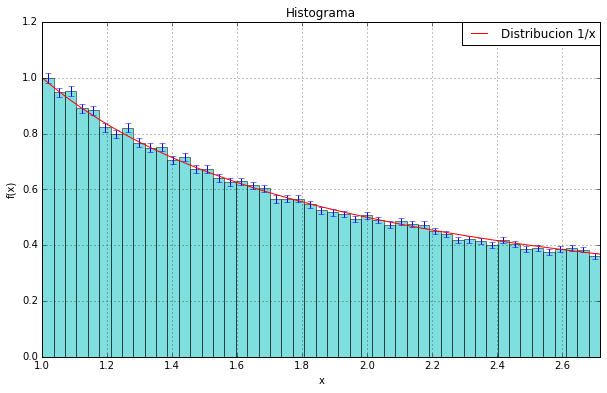

In [15]:
fig = plt.figure(figsize=(10,6))
plt.bar(bins[:-1], numero, width = np.diff(bins), yerr = error, ecolor="b", color='c', alpha=0.5)
plt.plot(puntos_a,fy(puntos_a), 'r-', label = 'Distribucion 1/x')
plt.legend(loc=1, borderaxespad=0.)
plt.xlim([1,np.e])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Histograma')
plt.grid()
plt.show()

## b)

A partir de una distribución uniforme, busco generar números al azar con distribución exponencial. Es decir, busco $y = \phi(x) $ tal que $ F_y(t) = 1- e^{-\lambda t}$.   
   
<center>
$ F_y (t) = P(y \leq t ) = P(\phi (x) \leq t) = P(x \leq \phi^{-1}(t)) = F_x (\phi^{-1}(t)) = \phi^{-1}(t) $   
</center></h1>
   
Pido que $F_y (t) = 1- e^{-\lambda t}$. Utilizando la notación abreviada $F_y(t) \rightarrow F(y) $, esta igualdad se escribe como   
   
<center>
$ F(y) = \phi^{-1}(y) = 1- e^{-\lambda y}$   
</center></h1>
   
Teniendo en cuenta que $\phi^{-1}(y) = x $, se obtiene $y = -\frac{1}{\lambda}\ln(1-x)$.

In [5]:
g = 0.25
def fyb(t):
    return g*np.exp(-g*t)
Mb = 500 
xb = uniform.rvs(size=Mb) #numeros aleatorios con distribucion uniforme
yb = -(1/g)*np.log(1-xb)
L = 30 #hasta donde quiero mirar el histograma
puntos_b = np.linspace(0,L,300) #para graficar f(y)
binesb1 = np.arange(0,L,0.7)
equiesp = np.arange(0,15,0.7)
anchos = np.arange(15,L,1.5)
binesb2 = np.concatenate((equiesp,anchos), axis=0) #bines mas gruesos a partir del numero 15

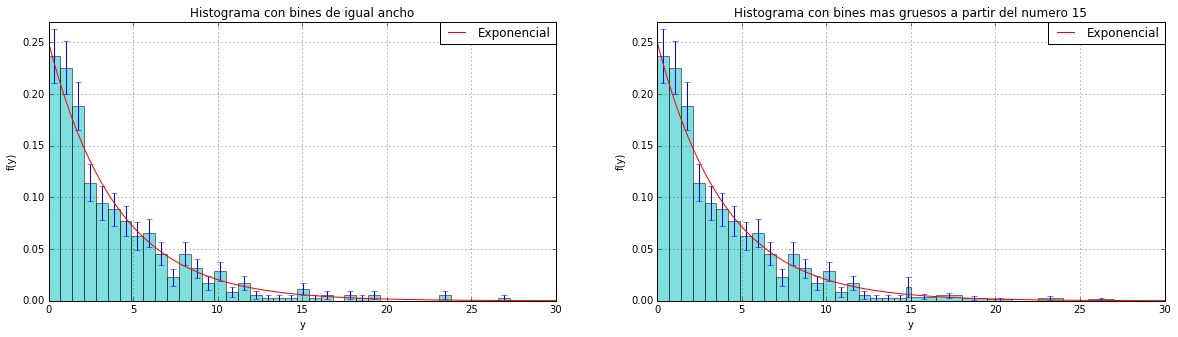

In [18]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

numero1, bins1 = np.histogram(yb, bins = binesb1) #numero=numero de entradas por bin
error1 = np.sqrt(numero1) / (np.diff(bins1) * np.sum(numero1)) #error poissoniano 
numero1 = numero1 / (np.diff(bins1) * np.sum(numero1)) #Normalizo a 1
ax1.bar(bins1[:-1], numero1, width = np.diff(bins1), yerr = error1, ecolor="b", color='c', alpha=0.5)
ax1.plot(puntos_b,fyb(puntos_b), 'r-', label = 'Exponencial')
ax1.set_xlim([0,L])
ax1.set_ylim([0,g+0.02])
ax1.set_xlabel('y')
ax1.set_ylabel('f(y)')
ax1.set_title('Histograma con bines de igual ancho')
ax1.legend(loc=1, borderaxespad=0.)
ax1.grid()


numero2, bins2 = np.histogram(yb, bins = binesb2) #numero=numero de entradas por bin
error2 = np.sqrt(numero2) / (np.diff(bins2) * np.sum(numero2)) #error poissoniano 
numero2 = numero2 / (np.diff(bins2) * np.sum(numero2)) #Normalizo a 1
ax2.bar(bins2[:-1], numero2, width = np.diff(bins2), yerr = error2, ecolor="b", color='c', alpha=0.5)
ax2.plot(puntos_b,fyb(puntos_b), 'r-', label = 'Exponencial')
ax2.set_xlim([0,L])
ax2.set_ylim([0,g+0.02])
ax2.set_xlabel('y')
ax2.set_ylabel('f(y)')
ax2.set_title('Histograma con bines mas gruesos a partir del numero 15')
ax2.legend(loc=1, borderaxespad=0.)
ax2.grid()